In [1]:
import os
import pandas as pd
import sqlite3
import requests
import webbrowser

# URLs for the datasets
url1 = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/ten00124?format=TSV&compressed=false"
url2 = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/sdg_13_10?format=TSV&compressed=false"
url3 = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/tps00128?format=TSV&compressed=false"

# Data directory
output_dir = "output"
tsv_paths = {
    "data1": os.path.join(output_dir, "final_energy_consumption_by_sector.tsv"),
    "data2": os.path.join(output_dir, "net_greenhouse_gas_emissions.tsv"),
    "data3": os.path.join(output_dir, "deaths_by_pneumonia.tsv")
}
excel_paths = {
    "data1": os.path.join(output_dir, "final_energy_consumption_by_sector.xlsx"),
    "data2": os.path.join(output_dir, "net_greenhouse_gas_emissions.xlsx"),
    "data3": os.path.join(output_dir, "deaths_by_pneumonia.xlsx")
}
database_paths = {
    "database1": os.path.join(output_dir, "final_energy_consumption_by_sector.db"),
    "database2": os.path.join(output_dir, "net_greenhouse_gas_emissions.db"),
    "database3": os.path.join(output_dir, "deaths_by_pneumonia.db")
}

# Creating output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to download and save files
def download_file(url, file_path):
    if not os.path.exists(file_path):
        response = requests.get(url)
        response.raise_for_status()
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {file_path}")
    else:
        print(f"File {file_path} already exists. Skipping download.")

# Downloading the datasets
print("Downloading datasets...")
download_file(url1, tsv_paths["data1"])
download_file(url2, tsv_paths["data2"])
download_file(url3, tsv_paths["data3"])
print("Download complete.")

# Reading the datasets into DataFrames
print("Reading datasets into DataFrames...")
energy_consumption = pd.read_csv(tsv_paths["data1"], delimiter='\t', encoding='ISO-8859-1', error_bad_lines=False, warn_bad_lines=True)
greenhouse_emissions = pd.read_csv(tsv_paths["data2"], delimiter='\t', encoding='ISO-8859-1', error_bad_lines=False, warn_bad_lines=True)
deaths = pd.read_csv(tsv_paths["data3"], delimiter='\t', encoding='ISO-8859-1', error_bad_lines=False, warn_bad_lines=True)

# Filling missing values with 0
print("Filling missing values...")
energy_consumption.fillna(0, inplace=True)
greenhouse_emissions.fillna(0, inplace=True)
deaths.fillna(0, inplace=True)

# Cleaning column names (strip and lowercase)
print("Cleaning column names...")
energy_consumption.columns = [col.strip().lower() for col in energy_consumption.columns]
greenhouse_emissions.columns = [col.strip().lower() for col in greenhouse_emissions.columns]
deaths.columns = [col.strip().lower() for col in deaths.columns]

# Saving cleaned DataFrames to Excel files
def save_to_excel(df, excel_path):
    if os.path.exists(excel_path):
        os.remove(excel_path)
    df.to_excel(excel_path, index=False)
    print(f"Data saved to {excel_path}")

# Saving cleaned DataFrames as Excel files
save_to_excel(energy_consumption, excel_paths["data1"])
save_to_excel(greenhouse_emissions, excel_paths["data2"])
save_to_excel(deaths, excel_paths["data3"])

print("Data cleaning and saving completed.")

# Saving DataFrames to SQLite databases
def save_to_sqlite(df, db_path, table_name):
    if os.path.exists(db_path):
        os.remove(db_path)
    conn = sqlite3.connect(db_path)
    df.to_sql(table_name, conn, if_exists="replace", index=False)
    conn.close()
    print(f"Data saved to {db_path} in table {table_name}")

save_to_sqlite(energy_consumption, database_paths["database1"], "final_energy_consumption_by_sector")
save_to_sqlite(greenhouse_emissions, database_paths["database2"], "net_greenhouse_gas_emissions")
save_to_sqlite(deaths, database_paths["database3"], "deaths_by_pneumonia")

print("Data pipeline execution completed.")

# Opening files with specified names
def open_files(file_paths):
    for file_path, display_name in file_paths.items():
        if os.path.exists(file_path):
            print(f"Opening {display_name} at {file_path}")
            webbrowser.open(f'file://{os.path.abspath(file_path)}')
        else:
            print(f"{file_path} does not exist.")

# Opening Excel files and SQLite databases with different names
excel_files = {
    excel_paths["data1"]: "Final Energy Consumption by Sector Data",
    excel_paths["data2"]: "Net Greenhouse Gas Emissions Data",
    excel_paths["data3"]: "Deaths caused by Pneumonia"
}
open_files(excel_files)

sqlite_dbs = {
    database_paths["database1"]: "Final Energy Consumption by Sector Database",
    database_paths["database2"]: "Net Greenhouse Gas Emissions Database",
    database_paths["database3"]: "Deaths caused by Pneumonia"
}
open_files(sqlite_dbs)


File output\final_energy_consumption_by_sector.tsv already exists. Skipping download.
File output\net_greenhouse_gas_emissions.tsv already exists. Skipping download.
File output\deaths_by_pneumonia.tsv already exists. Skipping download.
Download complete.
Reading datasets into DataFrames...


C:\Users\souha\AppData\Local\Temp\ipykernel_17924\698560353.py:54: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  energy_consumption = pd.read_csv(tsv_paths["data1"], delimiter='\t', encoding='ISO-8859-1', error_bad_lines=False, warn_bad_lines=True)
C:\Users\souha\AppData\Local\Temp\ipykernel_17924\698560353.py:54: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  energy_consumption = pd.read_csv(tsv_paths["data1"], delimiter='\t', encoding='ISO-8859-1', error_bad_lines=False, warn_bad_lines=True)
C:\Users\souha\AppData\Local\Temp\ipykernel_17924\698560353.py:55: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  greenhouse_emissions = pd.read_csv(tsv_paths["data2"], delimiter='\t', encoding='ISO-8859-1', error_bad_l

Filling missing values...
Cleaning column names...
Data saved to output\final_energy_consumption_by_sector.xlsx
Data saved to output\net_greenhouse_gas_emissions.xlsx
Data saved to output\deaths_by_pneumonia.xlsx
Data cleaning and saving completed.
Data saved to output\final_energy_consumption_by_sector.db in table final_energy_consumption_by_sector
Data saved to output\net_greenhouse_gas_emissions.db in table net_greenhouse_gas_emissions
Data saved to output\deaths_by_pneumonia.db in table deaths_by_pneumonia
Data pipeline execution completed.
Opening Final Energy Consumption by Sector Data at output\final_energy_consumption_by_sector.xlsx
Opening Net Greenhouse Gas Emissions Data at output\net_greenhouse_gas_emissions.xlsx
Opening Deaths caused by Pneumonia at output\deaths_by_pneumonia.xlsx
Opening Final Energy Consumption by Sector Database at output\final_energy_consumption_by_sector.db
Opening Net Greenhouse Gas Emissions Database at output\net_greenhouse_gas_emissions.db
Opening

### SECTOR WISE ENERGY CONSUMPTION

In [2]:
energy_consumption.columns

Index(['freq,nrg_bal,siec,unit,geo\time_period', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [3]:
energy_consumption.head()

,"freq,nrg_bal,siec,unit,geo\time_period",2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"A,FC_E,TOTAL,KTOE,AL",1953.468,1790.623,1961.871,2058.574,1962.498,1899.558,2078.928,2134.212,2053.036,1840.668,2012.504,1958.847
1,"A,FC_E,TOTAL,KTOE,AT",25092.859,25201.329,25801.476,24760.998,25475.009,26099.472,26502.780,26042.437,26221.621,24872.933,26487.778,24823.616
2,"A,FC_E,TOTAL,KTOE,BA",:,:,:,3103.624,3316.907,3543.934,3497.933,4211.931,4207.688,4024.489,4305.320,4290.012
3,"A,FC_E,TOTAL,KTOE,BE",32624.012,33058.280,34107.252,31594.248,33155.900,33437.524,32979.543,33204.836,32590.234,30938.838,33173.523,30383.390
4,"A,FC_E,TOTAL,KTOE,BG",9125.105,9103.369,8680.757,8881.501,9388.553,9517.949,9745.903,9757.670,9719.600,9499.659,10164.447,9854.067


In [4]:
# Filter the DataFrame where the specified columns end with "DE" i.e. Germany
energy_consumption_de = energy_consumption[energy_consumption['freq,nrg_bal,siec,unit,geo\\time_period'].str.endswith('DE')]
energy_consumption_de

,"freq,nrg_bal,siec,unit,geo\time_period",2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
7,"A,FC_E,TOTAL,KTOE,DE",199292.537,202662.536,208057.421,197229.019,200031.296,203666.981,204512.293,200684.593,200804.342,194248.055,197569.316,190442.433
48,"A,FC_IND_E,TOTAL,KTOE,DE",57409.744,56712.955,56347.486,55725.644,56067.590,56677.082,57146.089,57090.092,55649.346,54762.640,56214.334,53449.375
89,"A,FC_OTH_CP_E,TOTAL,KTOE,DE",30735.597,32027.815,33549.528,30766.034,32289.872,31865.517,31837.801,28892.812,27533.764,26842.069,30013.224,25459.838
130,"A,FC_OTH_HH_E,TOTAL,KTOE,DE",56020.249,59188.124,62517.628,53648.149,54959.824,56963.580,56777.115,55822.360,57743.030,57979.779,57672.167,57315.123
171,"A,FC_TRA_E,TOTAL,KTOE,DE",53638.674,53259.098,54240.042,55445.775,55144.756,56556.589,57247.225,55470.398,56220.462,51000.996,49902.777,50481.621


In [5]:
energy_consumption_de.rename(columns={'freq,nrg_bal,siec,unit,geo\\time_period': 'year'}, inplace=True)
energy_consumption_de

C:\Users\souha\AppData\Local\Temp\ipykernel_17924\1150574268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_consumption_de.rename(columns={'freq,nrg_bal,siec,unit,geo\\time_period': 'year'}, inplace=True)


,year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
7,"A,FC_E,TOTAL,KTOE,DE",199292.537,202662.536,208057.421,197229.019,200031.296,203666.981,204512.293,200684.593,200804.342,194248.055,197569.316,190442.433
48,"A,FC_IND_E,TOTAL,KTOE,DE",57409.744,56712.955,56347.486,55725.644,56067.590,56677.082,57146.089,57090.092,55649.346,54762.640,56214.334,53449.375
89,"A,FC_OTH_CP_E,TOTAL,KTOE,DE",30735.597,32027.815,33549.528,30766.034,32289.872,31865.517,31837.801,28892.812,27533.764,26842.069,30013.224,25459.838
130,"A,FC_OTH_HH_E,TOTAL,KTOE,DE",56020.249,59188.124,62517.628,53648.149,54959.824,56963.580,56777.115,55822.360,57743.030,57979.779,57672.167,57315.123
171,"A,FC_TRA_E,TOTAL,KTOE,DE",53638.674,53259.098,54240.042,55445.775,55144.756,56556.589,57247.225,55470.398,56220.462,51000.996,49902.777,50481.621


In [6]:
energy_consumption_de = energy_consumption_de.T  # Transpose the DataFrame
energy_consumption_de.columns = energy_consumption_de.iloc[0]  # Setting the first row as column headers
energy_consumption_de = energy_consumption_de[1:]  # Excluding the first row as it's now the header
energy_consumption_de

year,"A,FC_E,TOTAL,KTOE,DE","A,FC_IND_E,TOTAL,KTOE,DE","A,FC_OTH_CP_E,TOTAL,KTOE,DE","A,FC_OTH_HH_E,TOTAL,KTOE,DE","A,FC_TRA_E,TOTAL,KTOE,DE"
2011,199292.537,57409.744,30735.597,56020.249,53638.674
2012,202662.536,56712.955,32027.815,59188.124,53259.098
2013,208057.421,56347.486,33549.528,62517.628,54240.042
2014,197229.019,55725.644,30766.034,53648.149,55445.775
2015,200031.296,56067.59,32289.872,54959.824,55144.756
2016,203666.981,56677.082,31865.517,56963.58,56556.589
2017,204512.293,57146.089,31837.801,56777.115,57247.225
2018,200684.593,57090.092,28892.812,55822.36,55470.398
2019,200804.342,55649.346,27533.764,57743.03,56220.462
2020,194248.055,54762.640,26842.069,57979.779,51000.996


In [7]:
energy_consumption_de.rename(columns={
    'A,FC_E,TOTAL,KTOE,DE': 'Energy Total',
    'A,FC_IND_E,TOTAL,KTOE,DE': 'Energy Industrial',
    'A,FC_OTH_CP_E,TOTAL,KTOE,DE': 'Energy Commercial',
    'A,FC_OTH_HH_E,TOTAL,KTOE,DE': 'Energy Household',
    'A,FC_TRA_E,TOTAL,KTOE,DE': 'Energy Transport',
    
}, inplace=True)


energy_consumption_de

year,Energy Total,Energy Industrial,Energy Commercial,Energy Household,Energy Transport
2011,199292.537,57409.744,30735.597,56020.249,53638.674
2012,202662.536,56712.955,32027.815,59188.124,53259.098
2013,208057.421,56347.486,33549.528,62517.628,54240.042
2014,197229.019,55725.644,30766.034,53648.149,55445.775
2015,200031.296,56067.59,32289.872,54959.824,55144.756
2016,203666.981,56677.082,31865.517,56963.58,56556.589
2017,204512.293,57146.089,31837.801,56777.115,57247.225
2018,200684.593,57090.092,28892.812,55822.36,55470.398
2019,200804.342,55649.346,27533.764,57743.03,56220.462
2020,194248.055,54762.640,26842.069,57979.779,51000.996


### GREENHOUSE GAS EMISSIONS

In [8]:
greenhouse_emissions.columns

Index(['freq,airpol,src_crf,unit,geo\time_period', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')

In [9]:
greenhouse_emissions.head()

,"freq,airpol,src_crf,unit,geo\time_period",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"A,GHG,TOTX4_MEMONIA,I90,AT",100.0,104.7,96.6,97.2,97.5,101.7,105.8,105.4,104.6,...,102.9,98.4,101.4,102.8,105.6,101.9,103.8,93.9,98.3,93.6
1,"A,GHG,TOTX4_MEMONIA,I90,BE",100.0,101.4,101.1,100.3,103.4,105.0,107.8,102.3,106.1,...,83.5,79.8,82.9,81.8,81.8,82.5,81.8,74.5,77.0,73.1
2,"A,GHG,TOTX4_MEMONIA,I90,BG",100.0,81.9,76.5,76.1,71.8,73.4,73.5,70.1,66.0,...,55.0,58.0,61.3,58.7,60.6,56.3,54.9,48.6,54.7,59.2
3,"A,GHG,TOTX4_MEMONIA,I90,CH",100.0,103.1,102.9,98.6,97.0,98.9,100.2,98.4,101.3,...,99.9,93.2,92.6,93.5,92.1,90.1,89.8,78.9,81.6,78.9
4,"A,GHG,TOTX4_MEMONIA,I90,CY",100.0,110.2,116.7,119.3,123.7,123.5,128.9,130.2,135.9,...,138.3,144.2,144.5,153.4,158.0,157.0,157.6,140.5,147.3,151.9


In [10]:
# Filter the DataFrame where the specified columns end with "DE" i.e. Germany
greenhouse_emissions_de = greenhouse_emissions[greenhouse_emissions['freq,airpol,src_crf,unit,geo\\time_period'].str.endswith('DE')]
greenhouse_emissions_de

,"freq,airpol,src_crf,unit,geo\time_period",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
6,"A,GHG,TOTX4_MEMONIA,I90,DE",100.0,96.3,92.5,91.8,90.5,89.9,91.4,88.6,86.7,...,75.8,72.5,73.2,73.0,72.0,69.9,65.5,59.0,61.6,61.6
37,"A,GHG,TOTX4_MEMONIA,T_HAB,DE",15.9,15.2,14.5,14.3,14.0,13.9,14.1,13.6,13.3,...,11.9,11.3,11.3,11.2,11.0,10.6,10.0,9.0,9.4,9.3
68,"A,GHG,TOTXMEMONIA,I90,DE",100.0,91.9,87.7,87.1,86.2,86.2,87.3,84.7,82.9,...,72.8,70.2,70.7,70.4,69.7,68.1,63.6,58.0,60.2,60.3
99,"A,GHG,TOTXMEMONIA,T_HAB,DE",16.3,14.9,14.1,13.9,13.7,13.7,13.8,13.4,13.1,...,11.7,11.2,11.2,11.1,10.9,10.6,9.9,9.0,9.4,9.3


In [11]:
greenhouse_emissions_de.rename(columns={'freq,airpol,src_crf,unit,geo\\time_period': 'year'}, inplace=True)
greenhouse_emissions_de

C:\Users\souha\AppData\Local\Temp\ipykernel_17924\3371851477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greenhouse_emissions_de.rename(columns={'freq,airpol,src_crf,unit,geo\\time_period': 'year'}, inplace=True)


,year,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
6,"A,GHG,TOTX4_MEMONIA,I90,DE",100.0,96.3,92.5,91.8,90.5,89.9,91.4,88.6,86.7,...,75.8,72.5,73.2,73.0,72.0,69.9,65.5,59.0,61.6,61.6
37,"A,GHG,TOTX4_MEMONIA,T_HAB,DE",15.9,15.2,14.5,14.3,14.0,13.9,14.1,13.6,13.3,...,11.9,11.3,11.3,11.2,11.0,10.6,10.0,9.0,9.4,9.3
68,"A,GHG,TOTXMEMONIA,I90,DE",100.0,91.9,87.7,87.1,86.2,86.2,87.3,84.7,82.9,...,72.8,70.2,70.7,70.4,69.7,68.1,63.6,58.0,60.2,60.3
99,"A,GHG,TOTXMEMONIA,T_HAB,DE",16.3,14.9,14.1,13.9,13.7,13.7,13.8,13.4,13.1,...,11.7,11.2,11.2,11.1,10.9,10.6,9.9,9.0,9.4,9.3


In [12]:
greenhouse_emissions_de = greenhouse_emissions_de.T  # Transpose the DataFrame
greenhouse_emissions_de.columns = greenhouse_emissions_de.iloc[0]  # Setting the first row as column headers
greenhouse_emissions_de = greenhouse_emissions_de[1:]  # Excluding the first row as it's now the header

greenhouse_emissions_de

year,"A,GHG,TOTX4_MEMONIA,I90,DE","A,GHG,TOTX4_MEMONIA,T_HAB,DE","A,GHG,TOTXMEMONIA,I90,DE","A,GHG,TOTXMEMONIA,T_HAB,DE"
1990,100.0,15.9,100.0,16.3
1991,96.3,15.2,91.9,14.9
1992,92.5,14.5,87.7,14.1
1993,91.8,14.3,87.1,13.9
1994,90.5,14.0,86.2,13.7
1995,89.9,13.9,86.2,13.7
1996,91.4,14.1,87.3,13.8
1997,88.6,13.6,84.7,13.4
1998,86.7,13.3,82.9,13.1
1999,84.1,12.9,80.1,12.6


In [13]:
greenhouse_emissions_de = greenhouse_emissions_de.drop(columns=['A,GHG,TOTX4_MEMONIA,I90,DE','A,GHG,TOTXMEMONIA,I90,DE','A,GHG,TOTXMEMONIA,T_HAB,DE'])
greenhouse_emissions_de

year,"A,GHG,TOTX4_MEMONIA,T_HAB,DE"
1990,15.9
1991,15.2
1992,14.5
1993,14.3
1994,14.0
1995,13.9
1996,14.1
1997,13.6
1998,13.3
1999,12.9


In [14]:
greenhouse_emissions_de.rename(columns={'A,GHG,TOTX4_MEMONIA,T_HAB,DE': 'Greenhouse Emissions',}, inplace=True)
greenhouse_emissions_de

year,Greenhouse Emissions
1990,15.9
1991,15.2
1992,14.5
1993,14.3
1994,14.0
1995,13.9
1996,14.1
1997,13.6
1998,13.3
1999,12.9


In [15]:
# Function to clean the Greenhouse Emissions column
def clean_data_emissions(emission):
    if isinstance(emission, str):
        return emission.replace(" b", "")
    else:
        return emission

# Applying the function to the Greenhouse Emissions column and convert to float
greenhouse_emissions_de["Greenhouse Emissions"] = greenhouse_emissions_de["Greenhouse Emissions"].apply(clean_data_emissions).astype(float)

greenhouse_emissions_de

year,Greenhouse Emissions
1990,15.9
1991,15.2
1992,14.5
1993,14.3
1994,14.0
1995,13.9
1996,14.1
1997,13.6
1998,13.3
1999,12.9


### DEATHS DUE TO LUNG DISEASES 

In [16]:
deaths.columns

Index(['freq,unit,sex,age,icd10,geo\time_period', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [17]:
deaths.head()

,"freq,unit,sex,age,icd10,geo\time_period",2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"A,RT,F,TOTAL,J12-J18,AT",12.1,9.87,8.32,7.41,9.53,9.46,12.26,12.93,10.26,8.17,6.31
1,"A,RT,F,TOTAL,J12-J18,BE",27.22,29.12,29.13,25.69,30.33,28.04,30.46,32.78,28.71,22.47,17.21
2,"A,RT,F,TOTAL,J12-J18,BG",14.46,16.84,15.19,16.17,13.81,13.33,15.33,12.52,14.52,28.45,37.19
3,"A,RT,F,TOTAL,J12-J18,CH",14.43,14.55,14.94,12.46,16.02,11.9,14.66,13.37,11.48,9.61,8.3
4,"A,RT,F,TOTAL,J12-J18,CY",16.52,15.59,13.62,11.46,13.83,10.4,12.73,7.14,11.25,8.89,10.95


In [18]:
# Filter the DataFrame where the specified columns end with "DE" i.e. Germany
deaths_de = deaths[deaths['freq,unit,sex,age,icd10,geo\\time_period'].str.endswith('DE')]
deaths_de

,"freq,unit,sex,age,icd10,geo\time_period",2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
6,"A,RT,F,TOTAL,J12-J18,DE",19.19,18.19,19,15.13,17.74,16,16.86,16.82,14.85,11.82,10.09
41,"A,RT,M,TOTAL,J12-J18,DE",35.27,33.79,34.36,28.63,33.3,29.6,29.84,30.04,27.1,23.26,20.59
76,"A,RT,T,TOTAL,J12-J18,DE",24.63,23.48,24.39,19.85,23.24,20.95,21.55,21.76,19.47,16.22,14.12


In [19]:
deaths_de.rename(columns={'freq,unit,sex,age,icd10,geo\\time_period': 'year'}, inplace=True)
deaths_de

C:\Users\souha\AppData\Local\Temp\ipykernel_17924\3757451184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_de.rename(columns={'freq,unit,sex,age,icd10,geo\\time_period': 'year'}, inplace=True)


,year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
6,"A,RT,F,TOTAL,J12-J18,DE",19.19,18.19,19,15.13,17.74,16,16.86,16.82,14.85,11.82,10.09
41,"A,RT,M,TOTAL,J12-J18,DE",35.27,33.79,34.36,28.63,33.3,29.6,29.84,30.04,27.1,23.26,20.59
76,"A,RT,T,TOTAL,J12-J18,DE",24.63,23.48,24.39,19.85,23.24,20.95,21.55,21.76,19.47,16.22,14.12


In [20]:
deaths_de = deaths_de.T  # Transpose the DataFrame
deaths_de.columns = deaths_de.iloc[0]  # Setting the first row as column headers
deaths_de = deaths_de[1:]  # Excluding the first row as it's now the header
deaths_de

year,"A,RT,F,TOTAL,J12-J18,DE","A,RT,M,TOTAL,J12-J18,DE","A,RT,T,TOTAL,J12-J18,DE"
2011,19.19,35.27,24.63
2012,18.19,33.79,23.48
2013,19,34.36,24.39
2014,15.13,28.63,19.85
2015,17.74,33.3,23.24
2016,16,29.6,20.95
2017,16.86,29.84,21.55
2018,16.82,30.04,21.76
2019,14.85,27.1,19.47
2020,11.82,23.26,16.22


In [21]:
deaths_de.rename(columns={'A,RT,F,TOTAL,J12-J18,DE': 'Deaths Female',
                          'A,RT,M,TOTAL,J12-J18,DE': 'Deaths Male',
                          'A,RT,T,TOTAL,J12-J18,DE': 'Deaths Total'}, inplace=True)
deaths_de

year,Deaths Female,Deaths Male,Deaths Total
2011,19.19,35.27,24.63
2012,18.19,33.79,23.48
2013,19,34.36,24.39
2014,15.13,28.63,19.85
2015,17.74,33.3,23.24
2016,16,29.6,20.95
2017,16.86,29.84,21.55
2018,16.82,30.04,21.76
2019,14.85,27.1,19.47
2020,11.82,23.26,16.22


In [22]:
joined_df = energy_consumption_de.join(greenhouse_emissions_de, how='outer').join(deaths_de, how='outer')
joined_df

year,Energy Total,Energy Industrial,Energy Commercial,Energy Household,Energy Transport,Greenhouse Emissions,Deaths Female,Deaths Male,Deaths Total
1990,NaN,NaN,NaN,NaN,NaN,15.9,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,15.2,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,14.5,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,14.3,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,13.9,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,14.1,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,13.6,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,13.3,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,12.9,NaN,NaN,NaN


In [23]:
final_df = joined_df.dropna()
final_df

year,Energy Total,Energy Industrial,Energy Commercial,Energy Household,Energy Transport,Greenhouse Emissions,Deaths Female,Deaths Male,Deaths Total
2011,199292.537,57409.744,30735.597,56020.249,53638.674,11.6,19.19,35.27,24.63
2012,202662.536,56712.955,32027.815,59188.124,53259.098,11.7,18.19,33.79,23.48
2013,208057.421,56347.486,33549.528,62517.628,54240.042,11.9,19,34.36,24.39
2014,197229.019,55725.644,30766.034,53648.149,55445.775,11.3,15.13,28.63,19.85
2015,200031.296,56067.59,32289.872,54959.824,55144.756,11.3,17.74,33.3,23.24
2016,203666.981,56677.082,31865.517,56963.58,56556.589,11.2,16,29.6,20.95
2017,204512.293,57146.089,31837.801,56777.115,57247.225,11.0,16.86,29.84,21.55
2018,200684.593,57090.092,28892.812,55822.36,55470.398,10.6,16.82,30.04,21.76
2019,200804.342,55649.346,27533.764,57743.03,56220.462,10.0,14.85,27.1,19.47
2020,194248.055,54762.640,26842.069,57979.779,51000.996,9.0,11.82,23.26,16.22


In [24]:
cols_to_float = ['Energy Total', 'Energy Industrial','Energy Commercial','Energy Household','Energy Transport','Deaths Female', 'Deaths Male', 'Deaths Total']
final_df[cols_to_float] = final_df[cols_to_float].astype(float)
final_df

C:\Users\souha\AppData\Local\Temp\ipykernel_17924\3941099916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[cols_to_float] = final_df[cols_to_float].astype(float)


year,Energy Total,Energy Industrial,Energy Commercial,Energy Household,Energy Transport,Greenhouse Emissions,Deaths Female,Deaths Male,Deaths Total
2011,199292.537,57409.744,30735.597,56020.249,53638.674,11.6,19.19,35.27,24.63
2012,202662.536,56712.955,32027.815,59188.124,53259.098,11.7,18.19,33.79,23.48
2013,208057.421,56347.486,33549.528,62517.628,54240.042,11.9,19.00,34.36,24.39
2014,197229.019,55725.644,30766.034,53648.149,55445.775,11.3,15.13,28.63,19.85
2015,200031.296,56067.590,32289.872,54959.824,55144.756,11.3,17.74,33.30,23.24
2016,203666.981,56677.082,31865.517,56963.580,56556.589,11.2,16.00,29.60,20.95
2017,204512.293,57146.089,31837.801,56777.115,57247.225,11.0,16.86,29.84,21.55
2018,200684.593,57090.092,28892.812,55822.360,55470.398,10.6,16.82,30.04,21.76
2019,200804.342,55649.346,27533.764,57743.030,56220.462,10.0,14.85,27.10,19.47
2020,194248.055,54762.640,26842.069,57979.779,51000.996,9.0,11.82,23.26,16.22


In [25]:
correlation_matrix = final_df.corr()
correlation_matrix

year,Energy Total,Energy Industrial,Energy Commercial,Energy Household,Energy Transport,Greenhouse Emissions,Deaths Female,Deaths Male,Deaths Total
year,,,,,,,,,
Energy Total,1.000000,0.541670,0.710724,0.555600,0.534427,0.664862,0.655470,0.595597,0.639292
Energy Industrial,0.541670,1.000000,0.517945,-0.044480,0.359726,0.598234,0.614573,0.572678,0.596092
Energy Commercial,0.710724,0.517945,1.000000,0.218507,0.281757,0.832878,0.625229,0.653438,0.628893
Energy Household,0.555600,-0.044480,0.218507,1.000000,-0.272332,0.062148,0.112626,0.100204,0.111863
Energy Transport,0.534427,0.359726,0.281757,-0.272332,1.000000,0.511322,0.560526,0.475839,0.537936
Greenhouse Emissions,0.664862,0.598234,0.832878,0.062148,0.511322,1.000000,0.903185,0.917887,0.902901
Deaths Female,0.655470,0.614573,0.625229,0.112626,0.560526,0.903185,1.000000,0.989307,0.998745
Deaths Male,0.595597,0.572678,0.653438,0.100204,0.475839,0.917887,0.989307,1.000000,0.994165
Deaths Total,0.639292,0.596092,0.628893,0.111863,0.537936,0.902901,0.998745,0.994165,1.000000


C:\Users\souha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


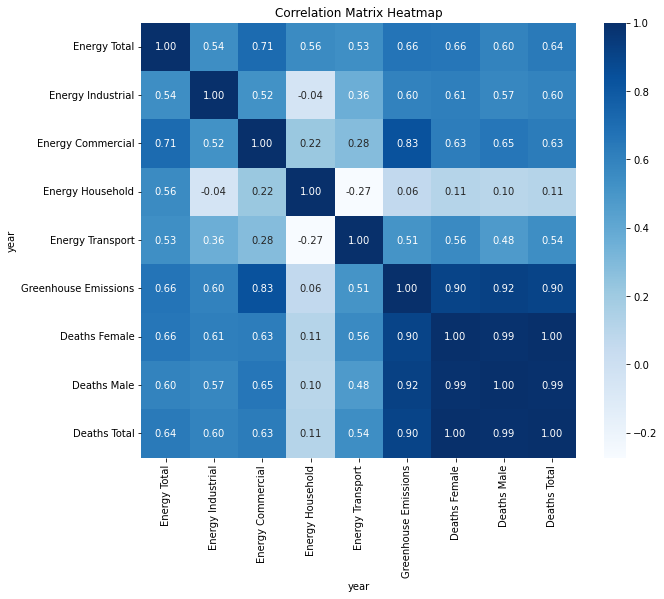

In [26]:
# Plotting the heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

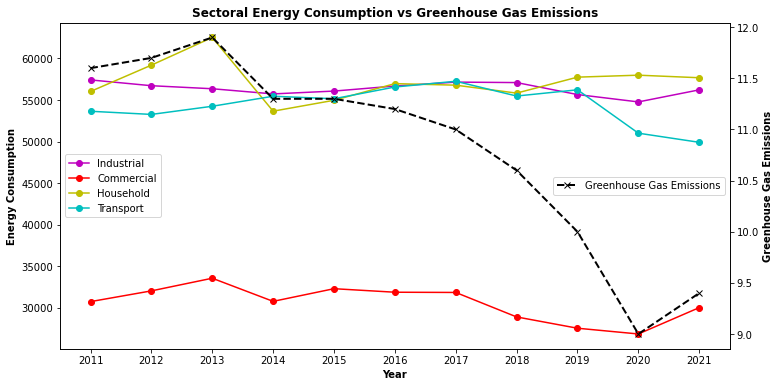

In [27]:
# Plotting Sectoral Energy Consumption vs Greenhouse Gas Emissions
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the line graphs for each sector
ax1.plot(final_df.index, final_df['Energy Industrial'], marker = 'o', linestyle='-', color='m', label='Industrial')
ax1.plot(final_df.index, final_df['Energy Commercial'], marker = 'o', linestyle='-', color='r', label='Commercial')
ax1.plot(final_df.index, final_df['Energy Household'], marker = 'o', linestyle='-', color='y', label='Household')
ax1.plot(final_df.index, final_df['Energy Transport'], marker = 'o', linestyle='-', color='c', label='Transport')

# Adding labels, title, and legend
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('Energy Consumption', fontweight='bold')
ax1.set_title('Sectoral Energy Consumption vs Greenhouse Gas Emissions', fontweight='bold')
ax1.legend(loc='center left')

# Creating a secondary y-axis to plot GHG Emissions
ax2 = ax1.twinx()
ax2.plot(final_df.index, final_df['Greenhouse Emissions'], label='Greenhouse Gas Emissions', marker='x', linestyle='--',color='black', linewidth=2)
ax2.set_ylabel('Greenhouse Gas Emissions', fontweight='bold')
ax2.tick_params(axis='y')
ax2.legend(loc='right')

# Displaying the plot
plt.show()

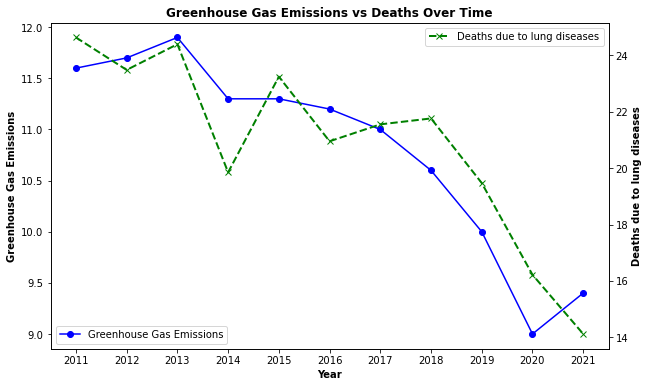

In [28]:
# Plotting Greenhouse Gas Emissions vs Deaths Over Time
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Energy_Total on primary y-axis (y1)
ax1.plot(final_df.index, final_df['Greenhouse Emissions'], marker='o', linestyle='-', color='b', label='Greenhouse Gas Emissions')
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('Greenhouse Gas Emissions', fontweight='bold')
ax1.tick_params(axis='y')
ax1.legend(loc='lower left')

# Creating a secondary y-axis (y2) for Greenhouse_Emissions
ax2 = ax1.twinx()
ax2.plot(final_df.index, final_df['Deaths Total'], marker='x', linestyle='--', color='g', label='Deaths due to lung diseases', linewidth=2)
ax2.set_ylabel('Deaths due to lung diseases', fontweight='bold')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Adding titles and legend
plt.title('Greenhouse Gas Emissions vs Deaths Over Time', fontweight='bold')


# Displaying the plot
plt.show()
